In [1]:
from jupyter_dash import JupyterDash

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import sympy as sm
import numpy as np
import pandas as pd
import scipy as sp
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
R0=6.6*10**10
R1=6.9634*10**10
R2=1.4*R1
R2

97487600000.0

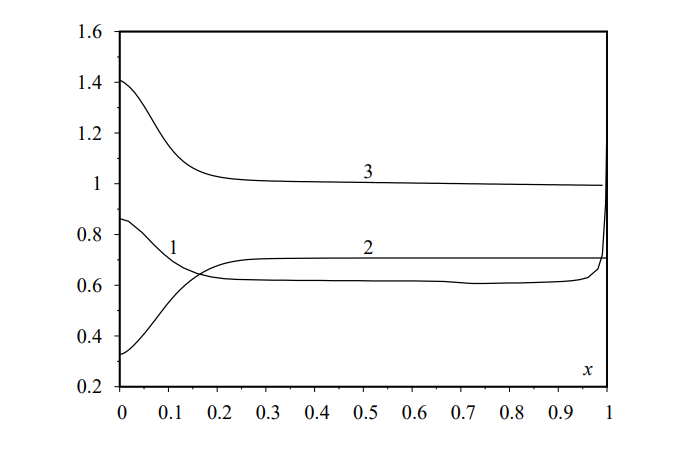

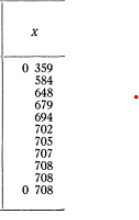

In [3]:
X=0.708
Z=0.020


In [4]:
yy=[.359,.584,.648,.679,.694,.702,.705,.707,.708,.708,.708]
xx=np.linspace(0,1,len(yy))
d={}
for i in range(len(xx)):
    d[xx[i]]=yy[i]
def mu1(x):
    return 1/(5/4*d[x]+3/4-Z/4)
# Pade 
def pade_mu(x):
    a0=0.0149173
    a1=-0.0868327
    a2=0.730856
    a3=1.7342
    b0=0.0172646
    b1=-0.0893741
    b2=1.0339
    b3=2.96529
    return(a0+a1*x+a2*x**2+a3*x**3)/(b0+b1*x+b2*x**2+b3*x**3)



fig=go.Figure()
fig.add_trace(go.Scatter(
    x=xx,
    y=yy,
    name="X0(x)"
    ))
fig.add_trace(go.Scatter(
    x=xx,
    y=[1/(5/4*d[x]+3/4-Z/4) for x in xx],
    name="mu(x)"
    ))
fig.add_trace(go.Scatter(
    x=xx,
    y=pade_mu(xx),
    name="pade_mu(x)"
    ))
fig.update_layout(
        showlegend=True,
         xaxis=dict(
            tickmode = 'array',
            tickvals = np.linspace(0, 1, 5),
            ticktext = ['0', "0.25", '0.5', '0.75', '1'],
        ),
        xaxis_title="x",   
)
fig

In [5]:
a=4
b=20
x_=sm.symbols("x")
a_=sm.symbols("a")
b_=sm.symbols("b")
X_x=X*((a_*x_**2+b_*x_**4)/(1+a_*x_**2+b_*x_**4))
XX=X*((a*x_**2+b*x_**4)/(1+a*x_**2+b*x_**4))

X_x

0.708*(a*x**2 + b*x**4)/(a*x**2 + b*x**4 + 1)

In [6]:
Xx=sm.lambdify([x_,a_,b_],X_x)
x=np.linspace(0,1,100)
#mu=sm.Function("mu")
def mu(x,a,b):
    return 1/(4/3*Xx(x,a,b)+3/4-Z/4)

mu(x_,4,15)

1/(1.33333333333333*(10.62*x**4 + 2.832*x**2)/(15*x**4 + 4*x**2 + 1) + 0.745)

In [7]:
def f_mu(x,mu_ser):
    return mu(x,4,15)/mu_ser

df=f_mu(x_,6.8).diff()


In [8]:
XX=X*((a*x_**2+b*x_**4)/(1+a*x_**2+b*x_**4))
xX=sm.lambdify([x_],XX)
XX

0.708*(20*x**4 + 4*x**2)/(20*x**4 + 4*x**2 + 1)

In [9]:
xx1=XX.diff()




Find: $$3\int_{0}^1 x^{2}\mu(x)dx$$

In [10]:
def mu1(x):
    return x**2*(1/(4/3*xX(x)+3/4-Z/4))
mu1(x_)

x**2/(1.33333333333333*(14.16*x**4 + 2.832*x**2)/(20*x**4 + 4*x**2 + 1) + 0.745)

In [11]:
3*sp.integrate.quad(mu1,0,1)[0]

0.6561532450528608

In [12]:
def int_mu(x,a,b):
    return x**2*(1/(4/3*Xx(x,a,b)+3/4-Z/4))



In [851]:
app = JupyterDash('X')
app.layout = html.Div([
    dcc.Graph(id='graph'),
    html.Div(
        [html.B("a="),
        dcc.Slider(0, 200,id="a",value=1),
         html.B("b="),
        dcc.Slider(0, 200,id="b",value=1)],
        style={"width":"35%","float":"left"}
    )
    
])
@app.callback(
    Output('graph', 'figure'),
    [Input("a", "value"),Input("b","value")]
)
def update_figure(a,b):
    fig=go.Figure()
    mu_ser=3*sp.integrate.quad(int_mu,0,1,args=(a,b))[0]
    fig.add_trace(go.Scatter(
    x=x,
    y=Xx(x,a,b),
    name="X(x)"
    ))
    fig.add_trace(go.Scatter(
    x=x,
    y=mu(x,a,b),
    name="mu(x)"
    ))
    fig.add_trace(go.Scatter(
    x=x,
    y=mu(x,a,b)/mu_ser,
    name="f(x)"
    ))
    fig.update_layout(
        legend_title_text='a2='+str(a)+" a4="+str(b),
        showlegend=True,
         xaxis=dict(
            tickmode = 'array',
            tickvals = np.linspace(0, 1, 5),
            ticktext = ['0', "0.25", '0.5', '0.75', '1']
         ),
        width=600,
        height=600,
        
        xaxis_title="x",
        yaxis_title="",
        
)   
    return fig
app.run_server(mode="inline",port=8080)

Dash is running on http://127.0.0.1:8080/



---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File ~\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_quadpack_py.py:463, in quad(
    func=<function int_mu>,
    a=0,
    b=1,
    args=(1, 1),
    full_output=0,
    epsabs=1.49e-08,
    epsrel=1.49e-08,
    limit=50,
    points=None,
    weight=None,
    wvar=None,
    wopts=None,
    maxp1=50,
    limlst=50,
    complex_func=False
)
    460     return retval
    462 if weight is None:
--> 463     retval = _quad(func, a, b, args, full_output, epsabs, epsrel, limit,
        args = (1, 1)
        a = 0
        b = 1
        full_output = 0
        epsabs = 1.49e-08
        epsrel = 1.49e-08
        limit = 50
        func = <function int_mu at 0x000001F3B3190CC0>
        points = None
    464                    points)
    465 else:
    466     if points is not None:

File ~\AppData\Local\Programs\Python\Py

In [32]:
a=4
b=15
xx=Xx(x,a,b)
mmu=mu(x,a,b)
mu_ser=3*sp.integrate.quad(int_mu,0,1,args=(4,15))[0]
def f_mu(x,mu_ser):
    return mu(x,a,b)/mu_ser
f_c=f_mu(x,mu_ser)[0]
mu0=mmu[0]
plt.plot(x,xx)
plt.plot(x,mmu)
plt.plot(x,f_mu(x,mu_ser))
mu0

NameError: name 'Xx' is not defined

Find: $$\frac{\partial^{2} y}{\partial \xi^2}=2/\xi*\frac{\partial y}{\partial \xi}-y^{3}$$


$$\frac{\partial y}{\partial \xi}=u=f(\xi,y,u)$$

$$\frac{\partial u}{\partial \xi}=2/\xi*u-y^{3}=g(\xi,y,u)$$

$$y(\xi_{0}+h)=y_{0}+1/6(k_{1}+2k_{2}+2k_{3}+k_{4})$$
$$u(\xi_{0}+h)=u_{0}+1/6(l_{1}+2l_{2}+2l_{3}+l_{4})$$

$$\xi_{0}=0, y_{0}=1, u_{0}=0 $$

$$k_{1}=hf(\xi_{0},y_{0},u_{0})$$
$$l_{1}=hg(\xi_{0},y_{0},u_{0})$$

$$k_{2}=hf(\xi_{0}+h/2,y_{0}+k_{1}/2,u_{0}+l_{1}/2)$$
$$l_{2}=hg(\xi_{0}+h/2,y_{0}+k_{1}/2,u_{0}+l_{1}/2)$$

$$k_{3}=hf(\xi_{0}+h/2,y_{0}+k_{2}/2,u_{0}+l_{2}/2)$$
$$l_{3}=hg(\xi_{0}+h/2,y_{0}+k_{2}/2,u_{0}+l_{2}/2)$$

$$k_{4}=hf(\xi_{0}+h,y_{0}+k_{3},u_{0}+l_{3})$$
$$l_{4}=hg(\xi_{0}+h,y_{0}+k_{3},u_{0}+l_{3})$$

In [354]:
def f(xi,y,u):
    return u
def g(xi,y,u):
    try:
        return -2/xi*u-y**3
    except ZeroDivisionError:
        return -y**3

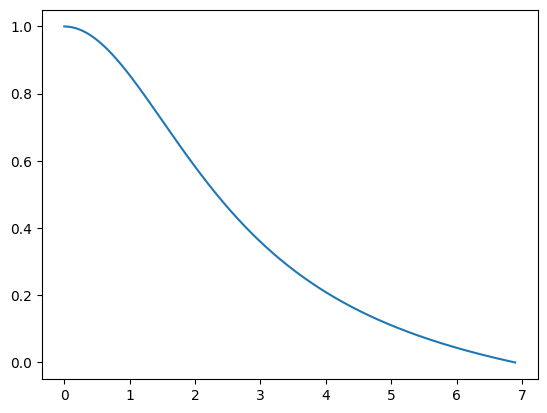

In [356]:
def rk(xi,y,u,h):
    k1=h*f(xi,y,u)
    l1=h*g(xi,y,u)
    k2=h*f(xi+h/2,y+k1/2,u+l1/2)
    l2=h*g(xi+h/2,y+k1/2,u+l1/2)
    k3=h*f(xi+h/2,y+k2/2,u+l2/2)
    l3=h*g(xi+h/2,y+k2/2,u+l2/2)
    k4=h*f(xi+h,y+k3,u+l3)
    l4=h*g(xi+h,y+k3,u+l3)
    return y0+1/6*(k1+2*k2+2*k3+k4),u0+1/6*(l1+2*l2+2*l3+l4)

#####################
y0=1
u0=0
xi0=0
h=1e-3
yy1=[y0]
du1=[u0]
xxi1=[xi0]


while y0>0:
    yn,un=rk(xi0,y0,u0,h)
    
    y0=yn
    u0=un
    xi0+=h
    yy1.append(y0)
    xxi1.append(xi0)
    du1.append(u0)
   
plt.plot(xxi1,yy1)
#################


    
 


Find: $$\frac{\partial^{2} y}{\partial \xi^2}=2/\xi*\frac{\partial y}{\partial \xi}-y^{3}f(\xi/\xi_{1})-f_{c}/\xi_{1}\frac{\partial f(\xi/\xi_{1})}{\partial(\xi/\xi_{1})}1/\xi^2 \int_{0}^\xi \xi^2y^3(\xi)\mu(\xi/\xi_{1})/\mu(0)d\xi$$


$$\frac{\partial y}{\partial \xi}=u=f(\xi,y,u)$$
$$\frac{\partial u}{\partial \xi}=2/\xi*u-y^{3}f^2(\xi/\xi_{1})-f_{c}/\xi_{1}\frac{\partial f(\xi/\xi_{1})}{\partial(\xi/\xi_{1})}1/\xi^2 \int_{0}^\xi \xi^2y^3(\xi)\mu(\xi/\xi_{1})/\mu(0)d\xi=g(\xi,y,u)$$

In [35]:
xi1=6.896

In [36]:
def int_mu(x,a,b):
    return x**2*(1/(4/3*Xx(x,a,b)+3/4-Z/4))

mu_ser=3*sp.integrate.quad(int_mu,0,1,args=(4,15))[0]

NameError: name 'Xx' is not defined

In [37]:


print(mu_ser)

def f_mu(x):
    return mu(x,a,b)/mu_ser


f_mu(x_)


0.6561532450528608


TypeError: mu() takes 1 positional argument but 3 were given

In [38]:
df=f_mu(x_).diff()
df

TypeError: mu() takes 1 positional argument but 3 were given

In [39]:
df=sm.lambdify([x_],df)

NameError: name 'df' is not defined

In [40]:
def int_(xi,y):
    return (xi**2)*(y**3)*(mu(xi/xi1,a,b)/mu0)
def g(xi,y,u):
    try:
        return -2/xi*u-(y**3)*(f_mu(xi/xi1)**2)-(f_c/xi1)*(df(xi/xi1))*(1/xi**2)*sp.integrate.quad(int_,0,xi,args=(y))[0]
    except ZeroDivisionError:
        return -y**3

In [41]:
y0=1
u0=0
xi0=0
h=1e-3
yy2=[y0]
du2=[u0]
xxi2=[xi0]
import pandas as pd 



while y0>0:
    yn,un=rk(xi0,y0,u0,h)
    
    y0=yn
    u0=un
    xi0+=h
    yy2.append(y0)
    xxi2.append(xi0)
    du2.append(u0)



TypeError: mu() takes 1 positional argument but 3 were given

In [42]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=xxi2,
    y=yy2,
    name="y2(x)"
    ))
fig.add_trace(go.Scatter(
    x=xxi1,
    y=yy1,
    name="y1(x)"
    ))
fig.update_layout(
        showlegend=True,
        width=600,
        height=600,
         xaxis=dict(
            tickmode = 'array',
            tickvals = np.linspace(0, xxi1[-1], 10),
        ),
        xaxis_title="xi",   
)
fig

In [14]:
def calc1(xi1,g,xxi):
    def rk(xi,y,u,h,g,xi1):
        k1=h*f(xi,y,u)
        l1=h*g(xi,y,u,xi1)
        k2=h*f(xi+h/2,y+k1/2,u+l1/2)
        l2=h*g(xi+h/2,y+k1/2,u+l1/2,xi1)
        k3=h*f(xi+h/2,y+k2/2,u+l2/2)
        l3=h*g(xi+h/2,y+k2/2,u+l2/2,xi1)
        k4=h*f(xi+h,y+k3,u+l3)
        l4=h*g(xi+h,y+k3,u+l3,xi1)
        return y0+1/6*(k1+2*k2+2*k3+k4),u0+1/6*(l1+2*l2+2*l3+l4)
    h=1e-3
    y0=1
    u0=0
    xi0=0
    y=[y0]
    du=[u0]
    xi=[xi0]
    while xi[-1]<xxi:
        y0,u0=rk(xi0,y0,u0,h,g,xi1)
        xi0+=h
        y.append(y0)
        xi.append(xi0)
        du.append(u0)
    return xi,y
X_=0.708
Z_=0.020
def f(xi,y,u):
    return u

def calc(xi1,g):
    def rk(xi,y,u,h,g,xi1):
        k1=h*f(xi,y,u)
        l1=h*g(xi,y,u,xi1)
        k2=h*f(xi+h/2,y+k1/2,u+l1/2)
        l2=h*g(xi+h/2,y+k1/2,u+l1/2,xi1)
        k3=h*f(xi+h/2,y+k2/2,u+l2/2)
        l3=h*g(xi+h/2,y+k2/2,u+l2/2,xi1)
        k4=h*f(xi+h,y+k3,u+l3)
        l4=h*g(xi+h,y+k3,u+l3,xi1)
        return y0+1/6*(k1+2*k2+2*k3+k4),u0+1/6*(l1+2*l2+2*l3+l4)
    h=1e-3
    y0=1
    u0=0
    xi0=0
    y=[y0]
    du=[u0]
    xi=[xi0]
    try:
        while y[-1]>0:
            y0,u0=rk(xi0,y0,u0,h,g,xi1)
            xi0+=h
            y.append(y0)
            xi.append(xi0)
            du.append(u0)
        return xi,y
    except ValueError:
        return print(y)

In [65]:
def X(x):
    a0=0.10342384
    a1=3.22737609
    a2=-5.62739888
    a3=32.79271356
    a4=-22.79852662
    b0=0.28808868
    b1=4.34225636
    b2=-7.99165352
    b3=46.44128928
    b4=-32.20745174
    return ((a0+a1*x+a2*x*x+a3*x*x*x+a4*x*x*x*x)/(b0+b1*x+b2*x*x+b3*x*x*x+b4*x*x*x*x))

def Y(x):
    return 1-X(x)-Z_
def mu(x):
    return 1/(5/4*X(x)+3/4-Z_/4)
def int_mu(x):
    return x**2*mu(x)
mu_ser=3*sp.integrate.quad(int_mu,0,1)[0]
print(mu_ser)
def F(x):
    return mu(x)/mu_ser



0.615177471683938


In [66]:
x=np.linspace(0,1,100)
yy=[.359,.584,.648,.679,.694,.702,.705,.707,.708,.708,.708]
xx=np.linspace(0,1,len(yy))

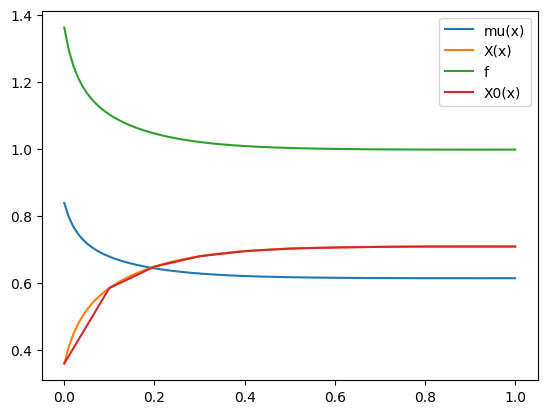

In [67]:
#plt.plot(x,X(x),label="X(x)")
plt.plot(x,mu(x),label="mu(x)")
plt.plot(x,X(x),label="X(x)")
plt.plot(x,F(x),label="f")
plt.plot(xx,yy,label="X0(x)")
plt.legend()

In [68]:
dF=F(x_).diff()
dF=sm.lambdify(x_,dF)
F(x_).diff()

1.04035019073133*(-1.25*(-91.19410648*x**3 + 98.37814068*x**2 - 11.25479776*x + 3.22737609)/(-32.20745174*x**4 + 46.44128928*x**3 - 7.99165352*x**2 + 4.34225636*x + 0.28808868) - 0.000579564101496595*(128.82980696*x**3 - 139.32386784*x**2 + 15.98330704*x - 4.34225636)*(-22.79852662*x**4 + 32.79271356*x**3 - 5.62739888*x**2 + 3.22737609*x + 0.10342384)/(-0.693508992522096*x**4 + x**3 - 0.172080785092278*x**2 + 0.0934999098285154*x + 0.00620328773094733)**2)/(0.596 + (-22.79852662*x**4 + 32.79271356*x**3 - 5.62739888*x**2 + 3.22737609*x + 0.10342384)/(-32.20745174*x**4 + 46.44128928*x**3 - 7.99165352*x**2 + 4.34225636*x + 0.28808868))**2

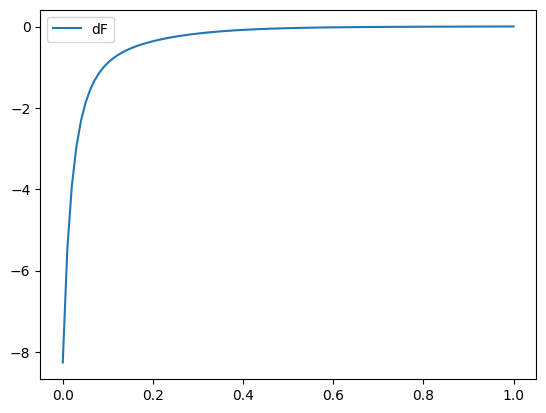

In [69]:
plt.plot(x,dF(x),label="dF")
plt.legend()

Find: $$\frac{\partial^{2} y}{\partial \xi^2}=2/\xi*\frac{\partial y}{\partial \xi}-y^{3}f(\xi/\xi_{1})-f_{c}/\xi_{1}\frac{\partial f(\xi/\xi_{1})}{\partial(\xi/\xi_{1})}1/\xi^2 \int_{0}^\xi \xi^2y^3(\xi)\mu(\xi/\xi_{1})/\mu(0)d\xi$$

In [70]:
y_t0 = pd.read_csv('y_res.txt', sep='\t+', header=None,engine='python')
y_t0.columns = ["xi", "y", "error"]
y_t0

xi         y     error
0     0.001  1.000000  0.000000
1     0.002  0.999999 -0.001139
2     0.003  0.999998 -0.001902
3     0.004  0.999996 -0.002599
4     0.005  0.999993 -0.003276
...     ...       ...       ...
7719  7.720  0.000135 -0.030682
7720  7.721  0.000105 -0.030674
7721  7.722  0.000074 -0.030666
7722  7.723  0.000043 -0.030658
7723  7.724  0.000013 -0.030650

[7724 rows x 3 columns]

In [71]:
y_t1 = pd.read_csv('res_6.txt', sep='\t+', header=None,engine='python')
y_t1.columns = ["xi", "y", "error"]
y_t1

xi             y     error
0       0.001  1.000000e+00  0.000000
1       0.002  9.999990e-01 -0.002009
2       0.003  9.999960e-01 -0.003356
3       0.004  9.999920e-01 -0.004586
4       0.005  9.999870e-01 -0.005783
...       ...           ...       ...
11651  11.652  4.215960e-05 -0.010534
11652  11.653  3.162690e-05 -0.010532
11653  11.654  2.109610e-05 -0.010530
11654  11.655  1.056700e-05 -0.010528
11655  11.656  3.976000e-08 -0.010526

[11656 rows x 3 columns]

7.257000000000758
7.295000000000771


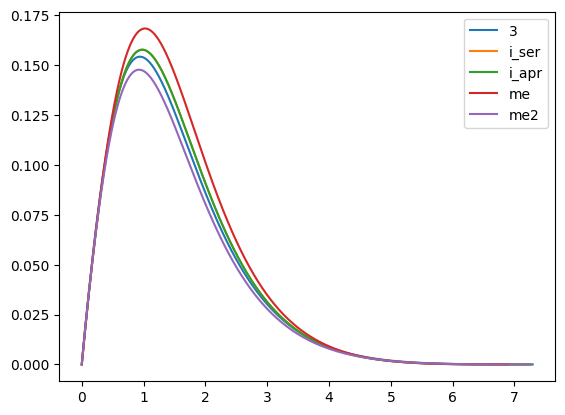

In [72]:
def error(xi1,g,eps):
    temp_xi1=xi1
    xi,y=calc(temp_xi1,g)
    err=xi[-1]-temp_xi1
    while err>eps:
        temp_xi1+=err
        xi,y=calc(temp_xi1,g)
        err=xi[-1]-temp_xi1
        #print(err)
       #input()
    return xi,y

def g1(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3#*F(xi/xi1)**2#-(F1(0)/xi1)*dF(xi/xi1)
    except ZeroDivisionError:
        return -y**3
def g2(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)**2#-(F1(0)/xi1)*dF(xi/xi1)
    except ZeroDivisionError:
        return -y**3
xi_me,y_me=calc(6.897,g1)
xi_me2,y_me2=error(6.897,g2,1e-4)
print(xi_me2[-1])

#y_ser=(np.array(y_me)+np.array(y_me2[:len(y_me)]))/2
#y_ser=np.concatenate((y_ser, np.array(y_me2[len(y_me):])))
apy=np.poly1d(np.polyfit(xi_me,y_me,14))
apy2=np.poly1d(np.polyfit(xi_me2,y_me2,14))
def alpha_y(x,y,xi1):
    return x**2*(y**3)*(mu(x/xi1)/mu(0))
def integ(xi,y,xi1):
    yy=[]
    for i in range(len(xi)):
        try:
            yy.append(1/xi[i]**2*sp.integrate.quad(alpha_y,0,xi[i],args=(y[i],xi1))[0])
        except ZeroDivisionError:
            yy.append(0)
    return yy
i_me=integ(xi_me,y_me,6.897)
i_me2=integ(xi_me2,y_me2,xi_me2[-1])



#print(np.average(i_me,i_me2))
i_ser=(np.array(i_me)+np.array(i_me2[:len(i_me)]))/2
i_ser=np.concatenate((i_ser, i_me2[len(i_ser):]))

#i_ser=[(i_me[i]+i_me2[i])/2 for i in range(len(i_me))]+i_me2[len(i_me):]

i_apr=np.poly1d(np.polyfit(xi_me2,i_ser,14))

def g3(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)**2-(F(0)/xi1)*dF(xi/xi1)*i_apr(xi)
    except ZeroDivisionError:
        return -y**3
xi_me3,y_me3=error(xi_me2[-1],g3,1e-2)
print(xi_me3[-1])
i_me3=integ(xi_me3,y_me3,10.5)

plt.plot(xi_me3,i_me3,label="3")
plt.plot(xi_me2,i_ser,label="i_ser")
plt.plot(xi_me2,i_apr(np.array(xi_me2)),label="i_apr")
plt.plot(xi_me,i_me,label="me")
plt.plot(xi_me2,i_me2,label="me2")
plt.legend()




7.295000000000771


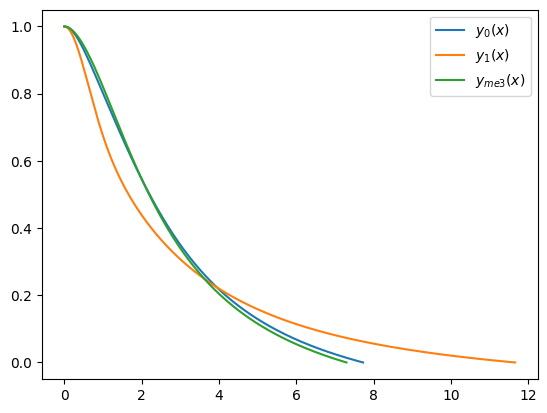

In [73]:

plt.plot(y_t0["xi"],y_t0["y"],label="$y_{0}(x)$")
plt.plot(y_t1["xi"],y_t1["y"],label="$y_{1}(x)$")
#plt.plot(xi_me2,y_me2,label="$y_{me}(x)$")
plt.plot(xi_me3,y_me3,label="$y_{me3}(x)$")
print(xi_me3[-1])
plt.legend()

$$\lambda=R_{\odot}\xi_{1}^{-1}$$

In [78]:
R0=6.9634*10**10
M0=1.9891*10**30
R0_0=6.646*10**10

gamma=(1/(4.5**2))*((R0/R0_0)-1)
rho_c=164.9420

#a=1.30993
print(gamma)
R1=R0_0*(1+gamma*(9**2))/10**10
R1

0.002358422219993086


7.915599999999999

In [79]:
xi1_=np.array(xi_me3[-1])
lamb_=R0*(1/xi1_)
lamb_/10**10


0.9545442083617907

In [80]:
xi1=np.array(y_t0["xi"])[-1]
lamb=R0*(1/xi1)
lamb/10**10
print(xi1)

7.724



$$\alpha = \int^{\xi1}_{0}d\xi \xi^{2}y^{3}(\xi)\frac{\mu(\xi/\xi_{1})}{\mu(0)}$$


In [81]:

apy_t1=np.poly1d(np.polyfit(xi_me3,y_me3,14))
print(xi1_)
def alpa_(x):
    return x**2*(apy_t1(x)**3)*(mu(x/xi1_)/mu(0))

a_=sp.integrate.quad(alpa_,0,xi1_)[0]
a_

7.295000000000771


1.325358549498365

In [82]:
    a0=0.10342384
    a1=3.22737609
    a2=-5.62739888
    a3=32.79271356
    a4=-22.79852662
    b0=0.28808868
    b1=4.34225636
    b2=-7.99165352
    b3=46.44128928
    b4=-32.20745174

In [83]:


def pade_mu(x):
    a0=0.0149173
    a1=-0.0868327
    a2=0.730856
    a3=1.7342
    b0=0.0172646
    b1=-0.0893741
    b2=1.0339
    b3=2.96529
    return(a0+a1*x+a2*x**2+a3*x**3)/(b0+b1*x+b2*x**2+b3*x**3)

mu1_ser=0.61328

def pade_f(x):
    return pade_mu(x)/mu1_ser
pade_df=sm.lambdify(x_,pade_f(x_).diff())


apy_t0=np.poly1d(np.polyfit(y_t0['xi'],y_t0['y'],14))
def alpa(x):
    return x**2*(apy_t0(x)**3)*(pade_mu(x/xi1)/pade_mu(0))
a=sp.integrate.quad(alpa,0,xi1)[0]
a

1.3191063212901504


$$\rho_{c}=M_{\odot}\xi_{1}^{3}(4\pi\alpha R_{\odot}^{3})^{-1}$$


In [84]:
rho_c_=(M0*xi1_**3)*(4*np.pi*a_*R0**3)**-1*1000
rho_c_

137.31729150094264


$$K=\pi^{1/3}G(M_{\odot}(4\alpha)^{-1})^{2/3}$$


In [85]:
K=np.pi**1/3*G*(M0*(4*a_)**-1)**2/3#np.pi*G*(lamb_)**2*(ro_c_/F(0))**2/3
K

NameError: name 'G' is not defined

$$\rho(\xi)=\rho_{c}\frac{f(\xi/\xi_{1})}{f_{c}}y^{3}(\xi)$$

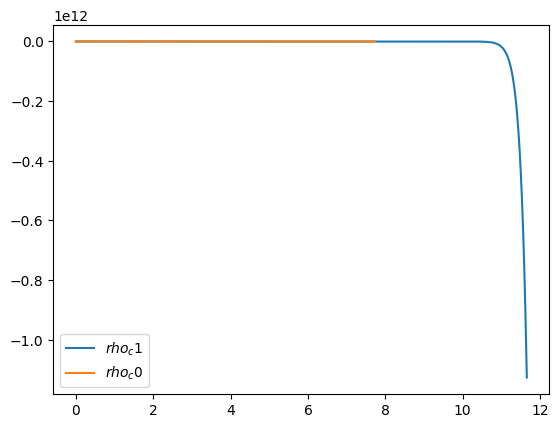

In [86]:
def rho_(x):
    return rho_c_*(F(x/xi1_)/F(0))*apy_t1(x)**3
def rho(x):
    return rho_c*(pade_f(x/xi1)/pade_f(0))*apy_t0(x)**3
plt.plot(y_t1["xi"],rho_(y_t1["xi"]),label='$rho_{c}1 $')
plt.plot(y_t0["xi"],rho(y_t0["xi"]),label='$rho_{c}0 $')
plt.legend()

$$I = \int^{\xi1}_{0}d\xi \xi^{4}y^{3}(\xi)\frac{\mu(\xi/\xi_{1})}{\mu(0)}$$

In [57]:
def I_(x):
    return x**4*(apy_t1(x)**3)*(mu(x/xi1_)/mu(0))
def I(x):
    return x**4*(apy_t0(x)**3)*(pade_mu(x/xi1)/pade_mu(0))
I_=sp.integrate.quad(I_,0,xi1_)[0]
I_

6.197421721252276

In [58]:
I=sp.integrate.quad(I,0,xi1)[0]
I

7.904236601712801

In [61]:
(a_/a)*(I/I_)*((xi1_**2)/(xi1**2))

1.4098438586151187

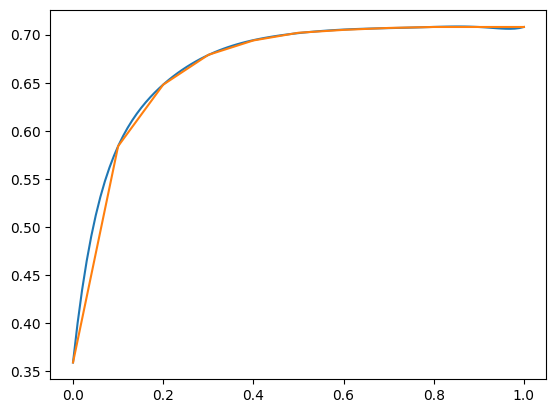

In [62]:
yy=[.359,.584,.648,.679,.694,.702,.705,.707,.708,.708,.708]
xx=np.linspace(0,1,len(yy))
X_t0=np.poly1d(np.polyfit(xx,yy,9))
#plt.plot(xx,yy)
plt.plot(np.linspace(0,1,100),X_t0(np.linspace(0,1,100)))
plt.plot(xx,yy)

In [63]:
def M_h0(r):
    return r**2*rho(r/R0)*X_t0(r/R0)
def M_h1(r):
    return r**2*rho_(r/R1)*X(r/R1)
print(4*np.pi*sp.integrate.quad(M_h0,0,R0)[0])
print(4*np.pi*sp.integrate.quad(M_h1,0,R1)[0])
delta_Mh=(4*np.pi*sp.integrate.quad(M_h0,0,R0)[0])-(4*np.pi*sp.integrate.quad(M_h1,0,R1)[0])
delta_Mh

9.018121643092148e+34
495416.88380779617


9.018121643092148e+34

In [64]:
c=sp.constants.c
c

299792458.0

In [1213]:

delta_E=delta_Mh*0.007*c**2
delta_E

5.673558470445353e+49

In [1214]:
L0=3.84*10**33

In [1215]:
t=(delta_Mh*0.007*c**2)/L0
t

1.4774891850118108e+16

In [944]:
omega0=0.3*10**-5
omega0

3e-06

0.5361927999284594

8.582000000000683


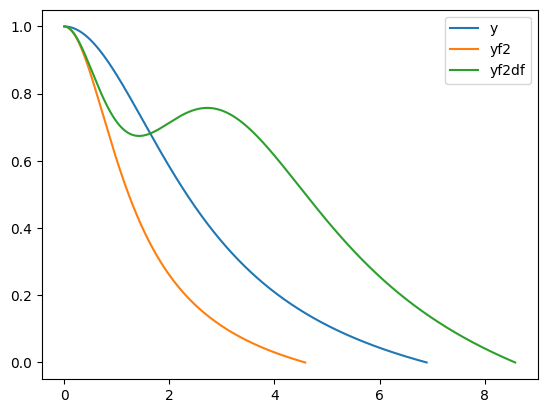

In [371]:
#xi1=6.896
def f(xi,y,u):
    return u
def g(xi,y,u):
    try:
        return -2/xi*u-y**3
    except ZeroDivisionError:
        return -y**3
def g1(xi,y,u):
    try:
        xi1=6.896
        return -2/xi*u-y**3*F1(xi/xi1)**2
    except ZeroDivisionError:
        return -y**3
def g2(xi,y,u):
    try:
        xi1=4.7
        return -2/xi*u-y**3*F1(xi/xi1)**2-(F1(0)/xi1)*dF(xi/xi1)
    except ZeroDivisionError:
        return -y**3
def rk(xi,y,u,h,g):
    k1=h*f(xi,y,u)
    l1=h*g(xi,y,u)
    k2=h*f(xi+h/2,y+k1/2,u+l1/2)
    l2=h*g(xi+h/2,y+k1/2,u+l1/2)
    k3=h*f(xi+h/2,y+k2/2,u+l2/2)
    l3=h*g(xi+h/2,y+k2/2,u+l2/2)
    k4=h*f(xi+h,y+k3,u+l3)
    l4=h*g(xi+h,y+k3,u+l3)
    return y0+1/6*(k1+2*k2+2*k3+k4),u0+1/6*(l1+2*l2+2*l3+l4)

#####################
h=1e-3
y0=1
u0=0
xi0=0
y=[y0]
du=[u0]
xi=[xi0]

while y[-1]>0:
    y0,u0=rk(xi0,y0,u0,h,g)
    xi0+=h
    y.append(y0)
    xi.append(xi0)
    du.append(u0)
###############################
y0=1
u0=0
xi0=0
yf2=[y0]
du=[u0]
xif2=[xi0]

while yf2[-1]>0:
    y0,u0=rk(xi0,y0,u0,h,g1)
    xi0+=h
    yf2.append(y0)
    xif2.append(xi0)
    du.append(u0)
################################
y0=1
u0=0
xi0=0
yf2df=[y0]
du=[u0]
xif2df=[xi0]

while yf2df[-1]>0:
    y0,u0=rk(xi0,y0,u0,h,g2)
    xi0+=h
    yf2df.append(y0)
    xif2df.append(xi0)
    du.append(u0)
plt.plot(xi,y,label="y")
plt.plot(xif2,yf2,label="yf2")
plt.plot(xif2df,yf2df,label="yf2df")
print(xif2df[-1])
plt.legend()

In [412]:
xi1=4.7
def Phi(x):
    a1=-0.00228434
    a2=1.44883
    a3=-0.21554
    a4=0.0188013
    b1=4.16376
    b2=0.483279
    b3=2.71489
    b4=2.21625
    return (a1*x+a2*x**2+a3*x**3+a4*x**4)/(b1*x+b2*x**2+b3*x**3+b4*x**4)

def int_(x,y,xi1):
    return (x**2)*(y**3)*(mu1(x/xi1)/mu1(0))



def int_phi(xi,y,xi1):
    yy=[]
    for i in range(len(xi)):
        try:
            yy.append(1/xi[i]**2*sp.integrate.quad(int_,0,xi[i],args=(y[i],xi1))[0])
        except ZeroDivisionError:
            yy.append(0)
    return yy

y1=int_phi(xif2df,yf2,4.7)
y2=int_phi(xif2df,y,6.896)
y3=int_phi(xif2df,yf2df,8.582)
plt.plot(xif2df,y1,label="yf2")
plt.plot(xif2df,y2,label="y")
plt.plot(xif2,Phi(np.array(xif2)),label="Phi")
plt.plot(xif2df,y3,label="yf2df")
plt.legend()

IndexError: list index out of range

array([0. , 1.5, 0. , 0. , 4. , 0.5, 3. , 2. ])

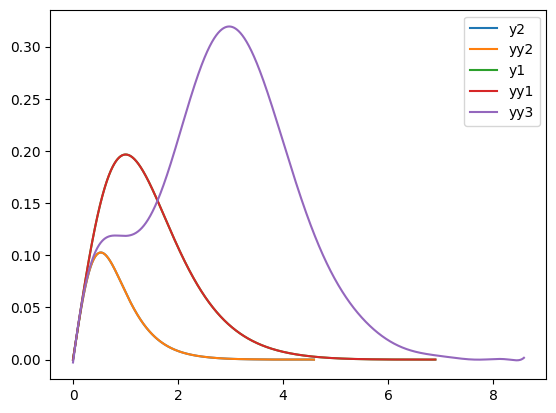

In [373]:

curve=np.polyfit(xif2,y1,14)
poly2=np.poly1d(curve)
curve=np.polyfit(xi,y2,14)
poly1=np.poly1d(curve)
curve=np.polyfit(xif2df,y3,14)
poly3=np.poly1d(curve)
        

plt.plot(xif2,y1,label="y2")
plt.plot(xif2,poly2(np.array(xif2)),label="yy2")
plt.plot(xi,y2,label="y1")
plt.plot(xi,poly1(np.array(xi)),label="yy1")
plt.plot(xif2df,poly3(np.array(xif2df)),label="yy3")
plt.legend()
opt

In [792]:

def g3(xi,y,u,xi1):
    try: 
        return -2/xi*u-y**3*F(xi/xi1)**2-(F(0)/xi1)*dF(xi/xi1)*Phi(xi)
    except ZeroDivisionError:
        return -y**3
def g4(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)**2-(F(0)/xi1)*dF(xi/xi1)*poly1(xi)
    except ZeroDivisionError:
        return -y**3
def g5(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)**2-(F(0)/xi1)*dF(xi/xi1)*poly2(xi)
    except ZeroDivisionError:
        return -y**3
def g6(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)**2-(F(0)/xi1)*dF(xi/xi1)*poly3(xi)
    except ZeroDivisionError:
        return -y**3
def calc(xi1,g):
    def rk(xi,y,u,h,g,xi1):
        k1=h*f(xi,y,u)
        l1=h*g(xi,y,u,xi1)
        k2=h*f(xi+h/2,y+k1/2,u+l1/2)
        l2=h*g(xi+h/2,y+k1/2,u+l1/2,xi1)
        k3=h*f(xi+h/2,y+k2/2,u+l2/2)
        l3=h*g(xi+h/2,y+k2/2,u+l2/2,xi1)
        k4=h*f(xi+h,y+k3,u+l3)
        l4=h*g(xi+h,y+k3,u+l3,xi1)
        return y0+1/6*(k1+2*k2+2*k3+k4),u0+1/6*(l1+2*l2+2*l3+l4)
    h=1e-3
    y0=1
    u0=0
    xi0=0
    y=[y0]
    du=[u0]
    xi=[xi0]
    while y[-1]>0:
        y0,u0=rk(xi0,y0,u0,h,g,xi1)
        xi0+=h
        y.append(y0)
        xi.append(xi0)
        du.append(u0)
    return xi,y
xi1=8.1611
xi_,y_=calc(xi1,g3)
print(xi_[-1])
#plt.plot(xi_,y_,label="phi")
xi_,y_=calc(xi1,g4)
print(xi_[-1])
#plt.plot(xi_,y_,label="y")
#xi_,y_=calc(xi1,g5)
#print(xi_[-1])
#plt.plot(xi_,y_,label="yf2")
#plt.legend()
#xi_,y_=calc(xi1,g6)
#print(xi_[-1])

#plt.plot(xi_,y_,label="yf2df")
#plt.legend()



9.387000000000237
22.96200000000508


In [793]:
app = JupyterDash('X')
app.layout = html.Div([
    dcc.Graph(id='graph'),
    html.Div(
        [html.B("xi1"),
        dcc.Slider(0,10,id="xi1",value=7.48)
         ],
       #  html.B("b="),
        #dcc.Slider(0, 200,id="b",value=1)
         
       # style={"width":"35%","float":"left"}
    )
    
])
@app.callback(
    Output('graph', 'figure'),
    [Input("xi1", "value")]
)
def update_figure(xi1):
    fig=go.Figure()
    xi_,y_=calc(xi1,g3)
    fig.add_trace(go.Scatter(
    x=xi_,
    y=y_,
    name="phi="+str(xi_[-1])
    ))
    xi_,y_=calc(xi1,g4)
    fig.add_trace(go.Scatter(
    x=xi_,
    y=y_,
    name="y="+str(xi_[-1])
    ))
    xi_,y_=calc(xi1,g5)
    fig.add_trace(go.Scatter(
    x=xi_,
    y=y_,
    name="yf2="+str(xi_[-1])
    ))
    xi_,y_=calc(xi1,g6)
    fig.add_trace(go.Scatter(
    x=xi_,
    y=y_,
    name="yf2df="+str(xi_[-1])+"    "+str(xi1)
    ))
    fig.update_layout(
        showlegend=True,
         xaxis=dict(
            tickmode = 'array'
            #tickvals = np.linspace(0, 1, 5),
            #ticktext = ['0', "0.25", '0.5', '0.75', '1']
         ),
        
        
        xaxis_title="x",
        yaxis_title="y")
        
       
    return fig
#app.run_server(mode="inline",port=8080)

In [794]:
data = pd.read_csv('res_5.txt', sep='\t+', header=None,engine='python')
data.columns = ["xi", "y", "error"]

#data

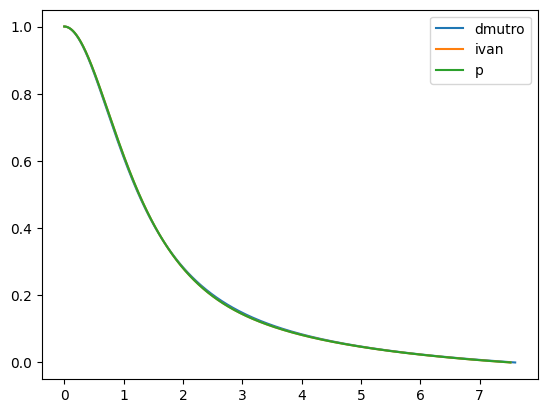

In [261]:

curve=np.polyfit(xi_,y_,14)
y_t=np.poly1d(curve)
plt.plot(data["xi"],data["y"],label="dmutro")
plt.plot(xi_,y_,label="ivan")
plt.plot(xi_,y_t(xi_),label="p")
plt.legend()

In [319]:
R0=6.9634*10**10
M0=1.9891*10**30
xi1=7.48
alpha=2.01824

rho_c=76.1731

a=1.30993



$$\lambda=R_{\odot}\xi_{1}^{-1}$$

In [320]:
lamb_=R0*(1/xi1)
lamb_/10**10

0.9309358288770052

$$\alpha = \int^{\xi1}_{0}d\xi \xi^{2}y^{3}(\xi)\frac{\mu(\xi/\xi_{1})}{\mu(0)}$$

In [321]:
xi1=7.48
def alpa(x):
    return x**2*(y_t(x)**3)*(mu(x/xi1)/mu(0))
a_=sp.integrate.quad(alpa,0,xi1)[0]
a_

0.33997893460393197

$$\rho_{c}=M_{\odot}\xi_{1}^{3}(4\pi\alpha R_{\odot}^{3})^{-1}$$

In [333]:
rho_c_=(M0*xi1**3)*(4*np.pi*a_*R0**3)**-1*1000
rho_c_

577.0793166925665

In [323]:
(M0*6.896**3)*(4*np.pi*(2.01824)*R0**3)**-1*1000

76.17310748769484

In [324]:
(M0*7.72441**3)*(4*np.pi*(a)*R0**3)**-1*1000

164.94174606625108

$$\rho^{\sim}=\rho\frac{\alpha}{\alpha^{\sim}}$$

In [335]:
164.9420*(a/a_)

635.517239654004

In [336]:
(M0/4*np.pi*a_)*(xi1/R0)**3

0.6583233684500448

$$K=\pi^{1/3}G(M_{\odot}(4\alpha)^{-1})^{2/3}$$

In [325]:
k=3.8416*10**14
G=6.67259*10**-12
G

6.6725899999999995e-12

In [326]:
np.pi**1/3*G*(M0*(4*2.01824)**-1)**2/3


1.4140000897436498e+47

In [327]:
np.pi*G*(1.0098*10**10)**2*rho_c**2/3

4134253013597.256

$$K=\pi G\lambda^{2}(\frac{\rho_{c}}{f_{c}})^{2/3}$$

In [328]:
np.pi*G*(0.9015*10**10)**2*(164.9420/1/4)**2/3

965599540177.7983

In [329]:
K=np.pi*G*(lamb_)**2*(ro_c_/F(0))**2/3
K

51364498112111.586

$$\rho(\xi)=\rho_{c}\frac{f(\xi/\xi_{1})}{f_{c}}y^{3}(\xi)$$

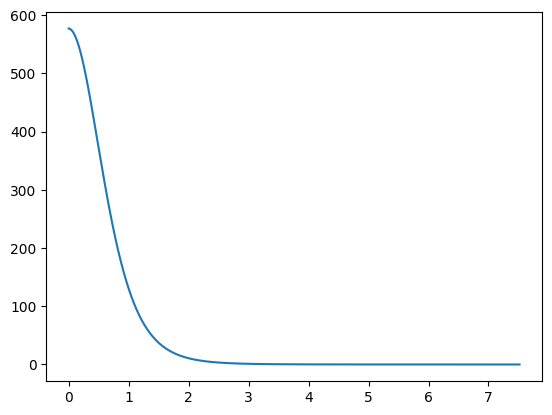

In [334]:
def rho(x,rho,xi1):
    return rho*(F(x/xi1)/F(0))*y_t(x)**3
plt.plot(xi_,rho(np.array(xi_),rho_c_,xi1))


$$I = \int^{\xi1}_{0}d\xi \xi^{4}y^{3}(\xi)\frac{\mu(\xi/\xi_{1})}{\mu(0)}$$

In [339]:
def I(x):
    return x**4*(y_t(x)**3)*(mu(x/xi1)/mu(0))
i_=sp.integrate.quad(I,0,xi1)[0]
i_

0.790592379596076

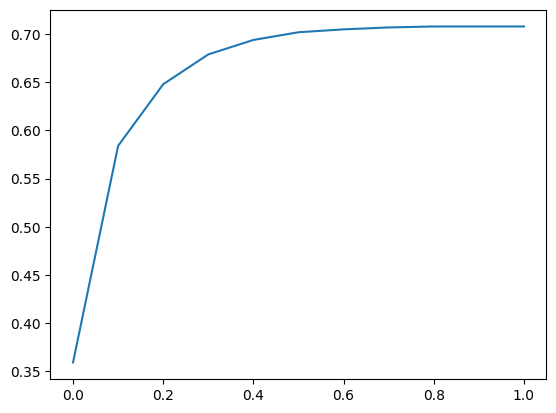

In [ ]:
def calc1(xi1,g):
    def rk(xi,y,u,h,g,xi1):
        k1=h*f(xi,y,u)
        l1=h*g(xi,y,u,xi1)
        k2=h*f(xi+h/2,y+k1/2,u+l1/2)
        l2=h*g(xi+h/2,y+k1/2,u+l1/2,xi1)
        k3=h*f(xi+h/2,y+k2/2,u+l2/2)
        l3=h*g(xi+h/2,y+k2/2,u+l2/2,xi1)
        k4=h*f(xi+h,y+k3,u+l3)
        l4=h*g(xi+h,y+k3,u+l3,xi1)
        return y0+1/6*(k1+2*k2+2*k3+k4),u0+1/6*(l1+2*l2+2*l3+l4)
    h=1e-3
    y0=1
    u0=0
    xi0=0
    y=[y0]
    du=[u0]
    xi=[xi0]
    while xi[-1]<15:
        y0,u0=rk(xi0,y0,u0,h,g,xi1)
        xi0+=h
        y.append(y0)
        xi.append(xi0)
        du.append(u0)
    return xi,y

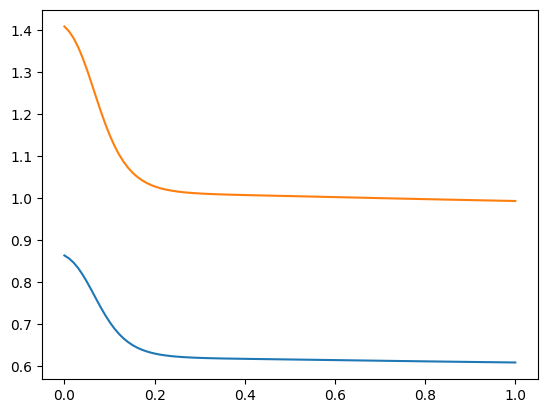

In [646]:
x=np.linspace(0,1,100)
def pade_mu(x):
    a0=0.0149173
    a1=-0.0868327
    a2=0.730856
    a3=1.7342
    b0=0.0172646
    b1=-0.0893741
    b2=1.0339
    b3=2.96529
    return(a0+a1*x+a2*x**2+a3*x**3)/(b0+b1*x+b2*x**2+b3*x**3)
#mu1_ser=sp.integrate.quad(pade_mu,0,1)[0])
mu1_ser=0.61328
def pade_f(x):
    return pade_mu(x)/mu1_ser
pade_df=sm.lambdify(x_,pade_f(x_).diff())

plt.plot(x,pade_mu(x))
plt.plot(x,pade_f(x))
#plt.plot(x,pade_df(x))

7.7250000000009145


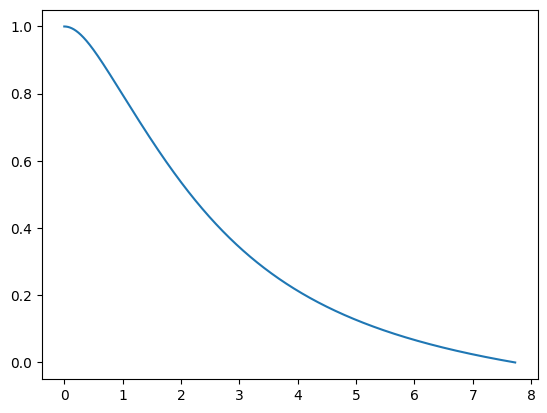

In [647]:
def g_pade(xi,y,u,xi1):
    try: 
        return -2/xi*u-y**3*pade_f(xi/xi1)**2-(pade_f(0)/xi1)*pade_df(xi/xi1)*Phi(xi)
    except ZeroDivisionError:
        return -y**3
xi_pade,y_pade=calc(7.4,g_pade)
print(xi_pade[-1])
plt.plot(xi_pade,y_pade)

6.897000000000638
3.958999999999675


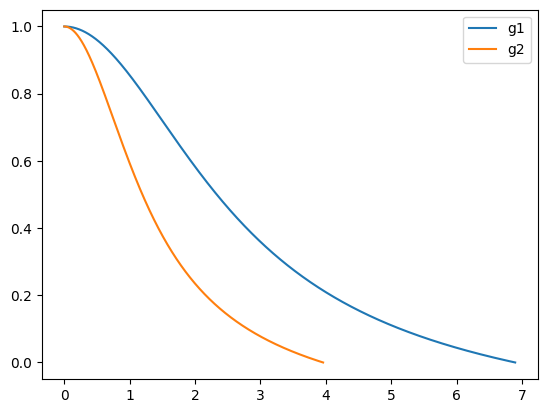

In [677]:
def g_1(xi,y,u,xi1):
    try: 
        return -2/xi*u-y**3#*F(xi/xi1)**2-(F(0)/xi1)*dF(xi/xi1)#*Phi(xi)
    except ZeroDivisionError:
        return -y**3
def g_2(xi,y,u,xi1):
    try: 
        return -2/xi*u-y**3*F(xi/xi1)**2#-(F(0)/xi1)*dF(xi/xi1)#*Phi(xi)
    except ZeroDivisionError:
        return -y**3
def g_3(xi,y,u,xi1):
    try: 
        return -2/xi*u-y**3*F(xi/xi1)**2-(F(0)/xi1)*dF(xi/xi1)*Phi(xi)
    except ZeroDivisionError:
        return -y**3
xi_g1,y_g1=calc(6,g_1)
print(xi_g1[-1])
xi_g2,y_g2=calc(6.897,g_2)
print(xi_g2[-1])

plt.plot(xi_g1,y_g1,label="g1")
plt.plot(xi_g2,y_g2,label="g2")
#plt.plot(xi_g3,y_g3,label="g3")
plt.legend()

C:\Users\vanity\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning:

Polyfit may be poorly conditioned

C:\Users\vanity\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning:

Polyfit may be poorly conditioned



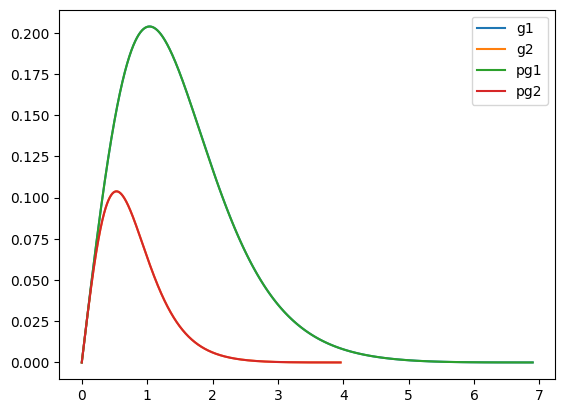

In [684]:
def integ(xi,y,xi1):
    yy=[]
    for i in range(len(xi)):
        try:
            yy.append(1/xi[i]**2*sp.integrate.quad(int_,0,xi[i],args=(y[i],xi1))[0])
        except ZeroDivisionError:
            yy.append(0)
    return yy
int_y_g1=integ(xi_g1,y_g1,6.897)
int_y_g2=integ(xi_g2,y_g2,3.958)
curve=np.polyfit(xi_g1,int_y_g1,20)
p_g1=np.poly1d(curve)
curve=np.polyfit(xi_g2,int_y_g2,20)
p_g2=np.poly1d(curve)
plt.plot(xi_g1,int_y_g1,label="g1")
plt.plot(xi_g2,int_y_g2,label="g2")
plt.plot(xi_g1,p_g1(np.array(xi_g1)),label="pg1")
plt.plot(xi_g2,p_g2(np.array(xi_g2)),label="pg2")
plt.legend()

8.445000000000759
4.919999999999978


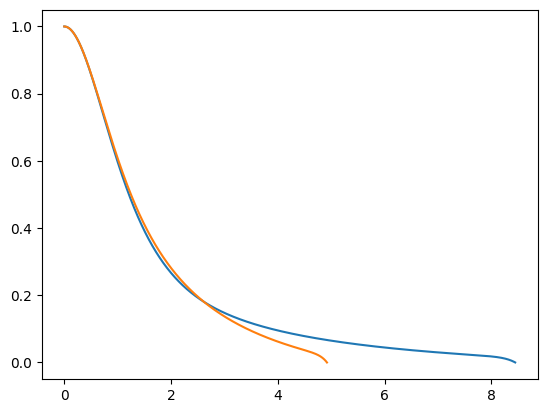

In [706]:
def g_1(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)**2-(F(0)/xi1)*dF(xi/xi1)*p_g1(xi)
    except ZeroDivisionError:
        return -y**3
def g_2(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)**2-(F(0)/xi1)*dF(xi/xi1)*p_g2(xi)
    except ZeroDivisionError:
        return -y**3   

xi_g1,y_g1=calc(8.45,g_1)
xi_g2,y_g2=calc(4.9,g_2)
#xi1=5.97
#xi1=12.11
print(xi_g1[-1])
print(xi_g2[-1])
plt.plot(xi_g1,y_g1,label="g1")
plt.plot(xi_g2,y_g2,label="g2")

C:\Users\vanity\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning:

Polyfit may be poorly conditioned

C:\Users\vanity\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning:

Polyfit may be poorly conditioned



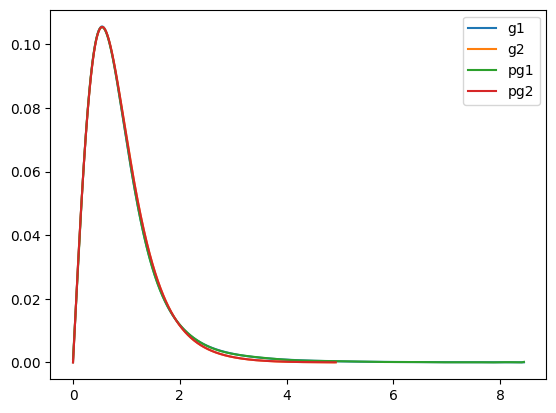

In [707]:
int_y_g1=integ(xi_g1,y_g1,8.45)
int_y_g2=integ(xi_g2,y_g2,4.9)
curve=np.polyfit(xi_g1,int_y_g1,20)
p_g1=np.poly1d(curve)
curve=np.polyfit(xi_g2,int_y_g2,20)
p_g2=np.poly1d(curve)
plt.plot(xi_g1,int_y_g1,label="g1")
plt.plot(xi_g2,int_y_g2,label="g2")
plt.plot(xi_g1,p_g1(np.array(xi_g1)),label="pg1")
plt.plot(xi_g2,p_g2(np.array(xi_g2)),label="pg2")
plt.legend()

10.000999999999896


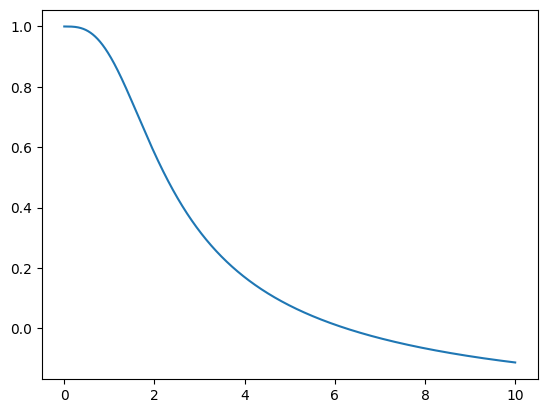

In [625]:
def gggg(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)**2*poly2(xi)
    except ZeroDivisionError:
        return -y**3
xi3,y3=calc1(6.25,gggg)
#xi=7.042
print(xi3[-1])
plt.plot(xi3,y3,label="yy")

C:\Users\vanity\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning:

Polyfit may be poorly conditioned



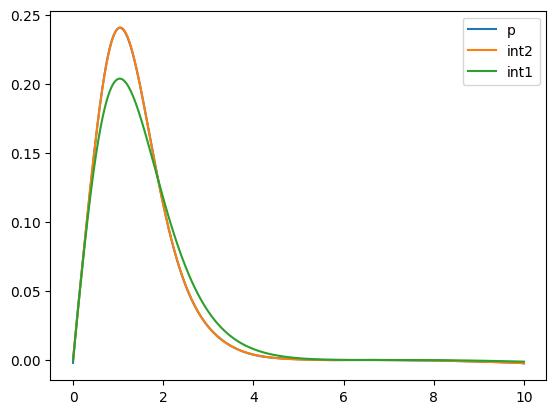

In [626]:
int_y3=int_y_g2=integ(xi3,y3,6.25)
curve=np.polyfit(xi3,int_y3,20)
poly3=np.poly1d(curve)
plt.plot(xi3,poly3(xi3),label="p")
plt.plot(xi3,int_y3,label="int2")
plt.plot(xi,int_y,label="int1")
plt.legend()

10.000999999999896


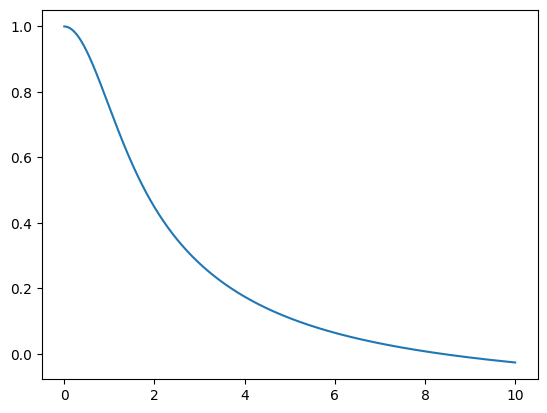

In [634]:
def ggggg(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)-(F(0)/xi1)*dF(xi/xi1)*poly3(xi)
    except ZeroDivisionError:
        return -y**3
xi4,y4=calc1(8.367,ggggg)
#xi=9.355,
print(xi4[-1])
plt.plot(xi4,y4,label="yy")

C:\Users\vanity\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning:

Polyfit may be poorly conditioned



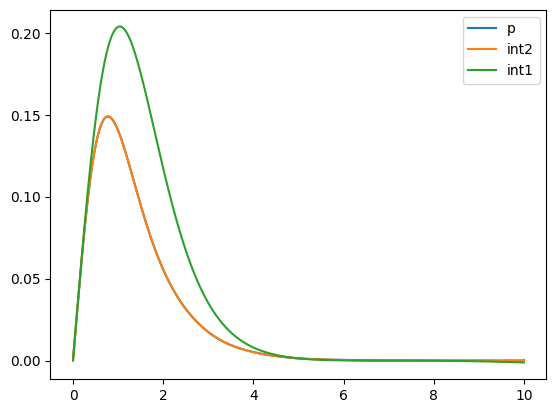

In [635]:
int_y4=int_y_g2=integ(xi4,y4,8.367)
curve=np.polyfit(xi4,int_y4,20)
poly4=np.poly1d(curve)
plt.plot(xi4,poly4(xi4),label="p")
plt.plot(xi4,int_y4,label="int2")
plt.plot(xi,int_y,label="int1")
plt.legend()

10.000999999999896


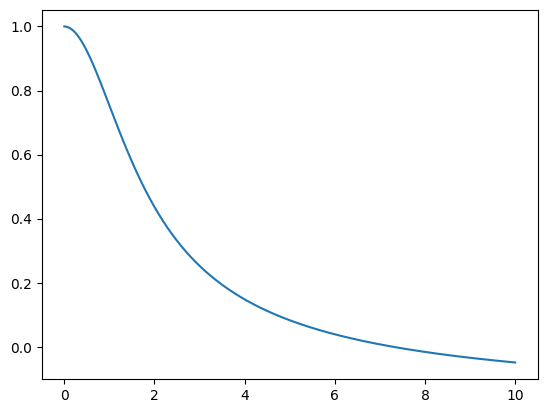

In [642]:
def gggggg(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)-(F(0)/xi1)*dF(xi/xi1)*poly4(xi)
    except ZeroDivisionError:
        return -y**3
xi5,y5=calc1(7.295,gggggg)
#xi=7.778
print(xi5[-1])
plt.plot(xi5,y5,label="yy")

C:\Users\vanity\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning:

Polyfit may be poorly conditioned



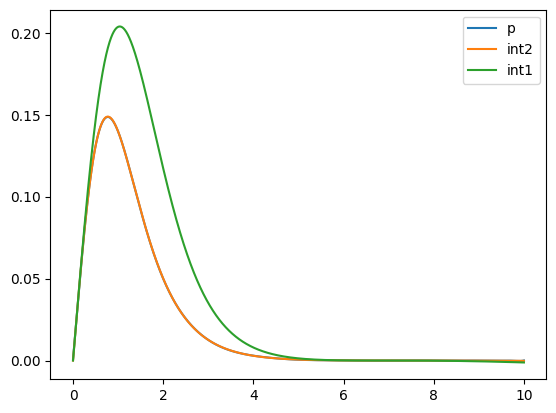

In [643]:
int_y5=int_y_g2=integ(xi5,y5,7.295)
curve=np.polyfit(xi5,int_y5,20)
poly5=np.poly1d(curve)
plt.plot(xi5,poly5(xi5),label="p")
plt.plot(xi5,int_y5,label="int2")
plt.plot(xi,int_y,label="int1")
plt.legend()

6.87300000000063


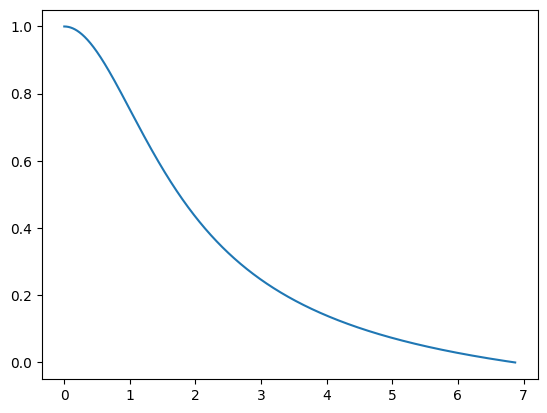

In [644]:
def ggggggg(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)-(F(0)/xi1)*dF(xi/xi1)*poly5(xi)
    except ZeroDivisionError:
        return -y**3
xi6,y6=calc(7.599,ggggggg)
#xi=7.599
print(xi6[-1])
plt.plot(xi6,y6,label="yy")

C:\Users\vanity\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning:

Polyfit may be poorly conditioned



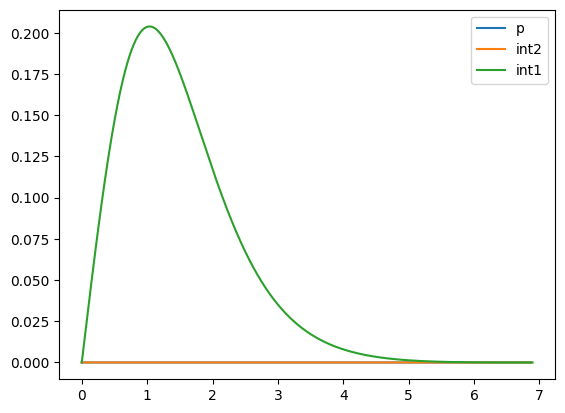

In [735]:
int_y6=int_y_g2=integ(xi6,y6,7.599)
curve=np.polyfit(xi6,int_y6,20)
poly6=np.poly1d(curve)
plt.plot(xi6,poly6(xi6),label="p")
plt.plot(xi6,int_y6,label="int2")
plt.plot(xi,int_y,label="int1")
plt.legend()

In [736]:
def gggggggg(xi,y,u,xi1):
    try:
        return -2/xi*u-y**3*F(xi/xi1)-(F(0)/xi1)*dF(xi/xi1)*poly5(xi)
    except ZeroDivisionError:
        return -y**3
xi7,y7=calc(7.599,gggggggg)
#xi=7.599
print(xi7[-1])
print(data)
plt.plot(xi7,y7,label="g7")
#plt.plot(xi5,y5,label="g5")
plt.plot(data["xi"],data["y"],label="dmutro")
plt.plot(xi_pade,y_pade,label="pade")
plt.legend()

TypeError: mu() missing 2 required positional arguments: 'a' and 'b'

In [578]:
lamb_=R0*(1/7.599)
lamb_/10**10

0.9163574154494011

In [584]:
xi1=7.599
curve=np.polyfit(xi7,y7,14)
y_g7=np.poly1d(curve)
curve=np.polyfit(xi_pade,y_pade,14)
proc_pade=np.poly1d(curve)
def alpa(x):
    return x**2*(y_g7(x)**3)*(mu(x/xi1)/mu(0))
a_=sp.integrate.quad(alpa,0,xi1)[0]
a_

0.8828782638991013

In [580]:
rho_c_=(M0*xi1**3)*(4*np.pi*a_*R0**3)**-1*1000
rho_c_

250.3091437934325

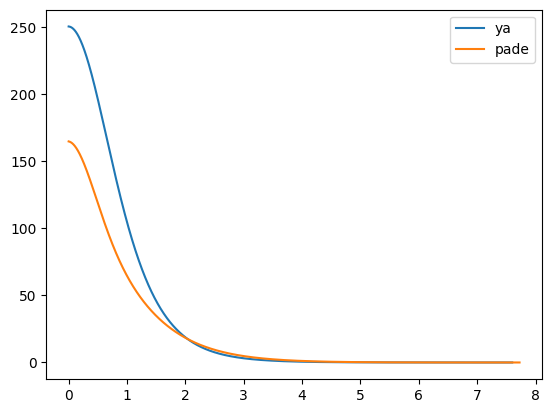

In [586]:
a=1.30993
rho_c=164.9420
def rho_(x,rho,xi1):
    return rho*(F(x/xi1)/F(0))*y_g7(x)**3
def rho(x,rho,xi1):
    return rho*(pade_f(x/xi1)/pade_f(0))*proc_pade(x)**3
plt.plot(xi7,rho_(np.array(xi7),rho_c_,xi1),label="ya")
plt.plot(xi_pade,rho(np.array(xi_pade),rho_c,7.72441),label="pade")
plt.legend()